In [2]:
from typing import TypedDict, Dict, List
from langgraph.graph import StateGraph, START, END
import random

In [3]:
class AgentState(TypedDict):
    name:str
    numbers:List[int]
    counter:int

In [4]:
def greeting_node(state:AgentState)->AgentState:
    state['name'] = f"Hi there, {state['name']}"
    state['counter'] = 0
    return state

def random_node(state:AgentState)->AgentState:
    state['numbers'].append(random.randint(0,10))
    state['counter'] += 1
    return state

def should_continue(state:AgentState)->AgentState:
    if state['counter'] < 5:
        print("entering the loop", state['counter'])
        return "loop"
    else:
        return "exit"

In [5]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge(START, "greeting")
graph.add_edge("greeting", "random")
graph.add_conditional_edges(
    source="random",
    path=should_continue,
    path_map={
        "loop":"random",
        "exit":END
    }
)
app = graph.compile()

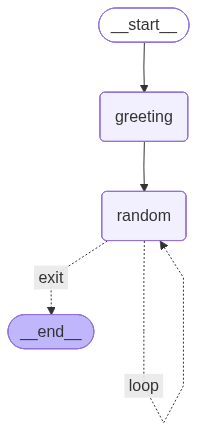

In [7]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
res = app.invoke(
    {
        "name":"Utsav",
        "numbers":[],
        "counter":-1
    }
)

entering the loop 1
entering the loop 2
entering the loop 3
entering the loop 4


In [9]:
res

{'name': 'Hi there, Utsav', 'numbers': [0, 3, 10, 8, 6], 'counter': 5}